# Machine Learning & Statistics- Assessment 2019

![title](img/Image2.png)

# The Boston House Price Dataset

## Set up the environment

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.datasets import load_boston 
from string import ascii_letters
%matplotlib inline 

In [7]:
df = load_boston()
print(df.data.shape)


(506, 13)


<h3 style="text-align: center;"> The Datasets Variables</h3>


|s.No |Attributes     |Description                                                         |
|----:---------------:-------------------------------------------------------------------:-
|1.   |CRIM           |per capita crime rate by town                                       |
|2.   |ZN             |the proportion of residential land zoned for lots over 25,000 sq.ft.|
|3.   |INDUS          |the proportion of non-retail business acres per town                |
|4.   |CHAS           |Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
|5.   |NOX            |nitric oxides concentration (parts per 10 million)                  |
|6.   |RM             |the average number of rooms per dwelling                            |
|7.   |AGE            |the proportion of owner-occupied units built prior to 1940          |
|8.   |DIS            |weighted distances to five Boston employment centres                |
|9.   |RAD            |index of accessibility to radial highways                           |
|10.  |TAX            |full-value property-tax rate per 10,000                             |
|11.  |PTRATIO        |the pupil-teacher ration by the town                                |
|12.  |B-1000(BK-0.63)|Where Bk is the proportion of blacks by the town                    | 
|13.  |LSTAT          |percentage lower status of the population                           |
|14.  |MEDV           |the median value of owner-occupied homes in  1000's                 |

In [81]:
from sklearn.datasets import load_boston
boston = load_boston()

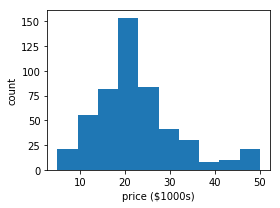

In [82]:
plt.figure(figsize=(4, 3))
plt.hist(boston.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [9]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [27]:
df.describe

<bound method NDFrame.describe of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0

In [ ]:
boston.corr()

In [40]:
x = df[['CRIM', 'AGE']]

In [41]:
y = df['target']

In [12]:
import sklearn.linear_model as lm

In [42]:
m = lm.LinearRegression()

In [43]:
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
m.intercept_

29.817657764146496

In [45]:
m.coef_

array([-0.30938048, -0.09001853])

In [46]:
m.score(x,y)

0.2154330285827789

In [18]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['CRIM'] + u * x['CHAS'] + v * x['RM'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.5512734592910271

In [ ]:
boston.T.plot()
plt.ylabel('target')

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


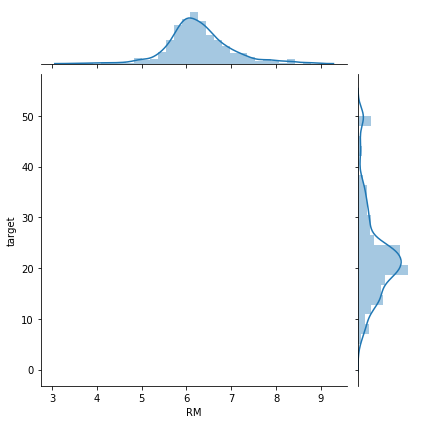

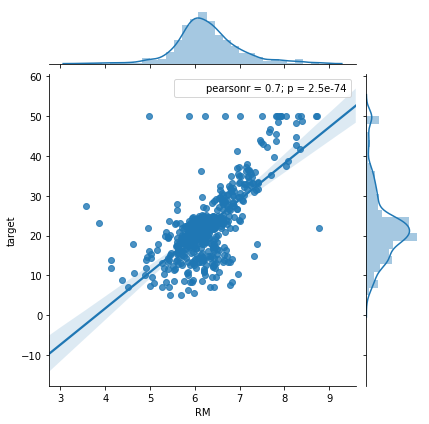

In [30]:
sns.jointplot(x='RM', y='target', data=df, kind='reg');
plt.show();

In [ ]:
df.describe()

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


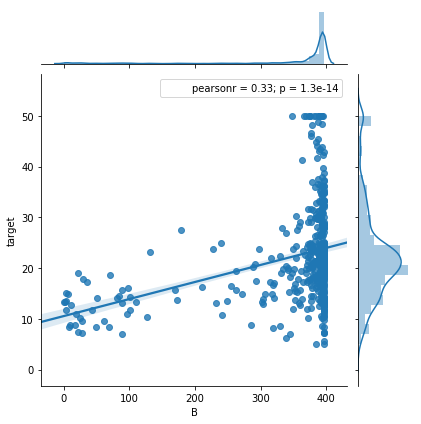

In [34]:
sns.jointplot(x='B', y='target', data=df, kind='reg');
plt.show();

### Now we will look at the variables that is most closely correlated with the median house value. To do this I will use the 

In [39]:
coor_matrix = df.corr()

In [40]:
coor_matrix["target"].sort_values(ascending=False)

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

In [42]:
from pandas.plotting import scatter_matrix

# Scatter Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FA7CEB8>,
      dtype=object)

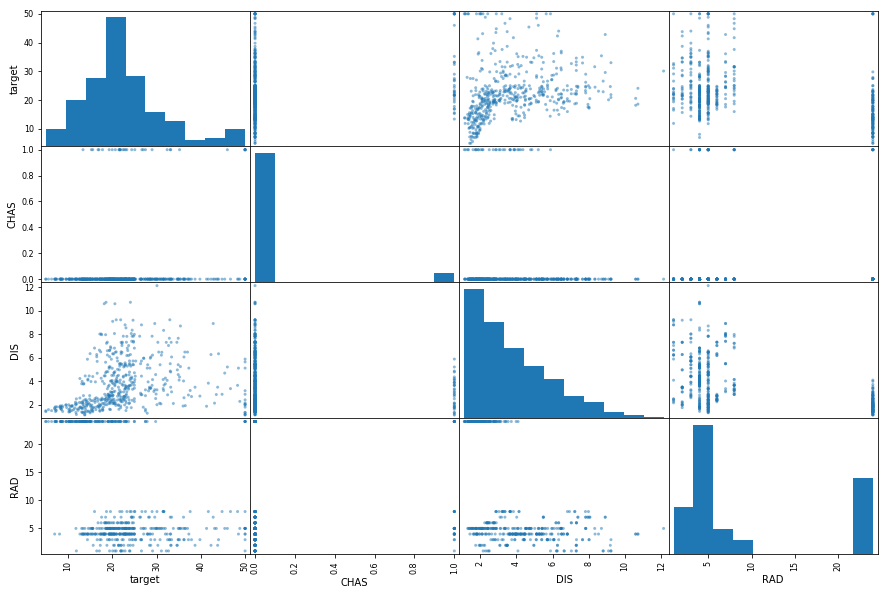

In [49]:
attributes = ["target", "CHAS", "DIS",
"RAD"]
scatter_matrix(df[attributes], figsize=(15, 10))


In [50]:
import seaborn as sns

In [54]:
cm = np.corrcoef(df)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)

NameError: name 'cols' is not defined

In [55]:
print("Boston housing dataset has {} data points with {} variables each.".format(*df.shape))

Boston housing dataset has 506 data points with 14 variables each.


In [62]:
import numpy.ma as ma

In [63]:
# Minimum price of the data
minimum_price = np.amin('target')

# Maximum price of the data
maximum_price = np.amax('target')

# Mean price of the data
mean_price = np.mean('target')

# Median price of the data
median_price = np.median('target')

# Standard deviation of prices of the data
std_price = np.std('target')

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

TypeError: cannot perform reduce with flexible type

In [26]:
import statsmodels.api as sm

C:\Users\gerardh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [47]:
xwithc = sm.add_constant(x)

msm = sm.OLS(y, xwithc)

rsm = msm.fit()
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     69.06
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           3.16e-27
Time:                        11:18:41   Log-Likelihood:                -1778.9
No. Observations:                 506   AIC:                             3564.
Df Residuals:                     503   BIC:                             3576.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8177      0.971     30.700      0.0

In [72]:
x = df['AGE']
y = df['target']
m, c = np.polyfit(x, y, 1)

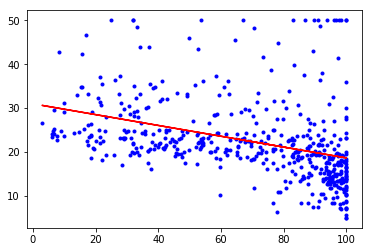

In [73]:
plt.plot(x, y, 'b.')
plt.plot(x, m * x + c, 'r-')
plt.show()

In [83]:
df = pd.DataFrame(boston.data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [84]:
df['target'] = boston.target

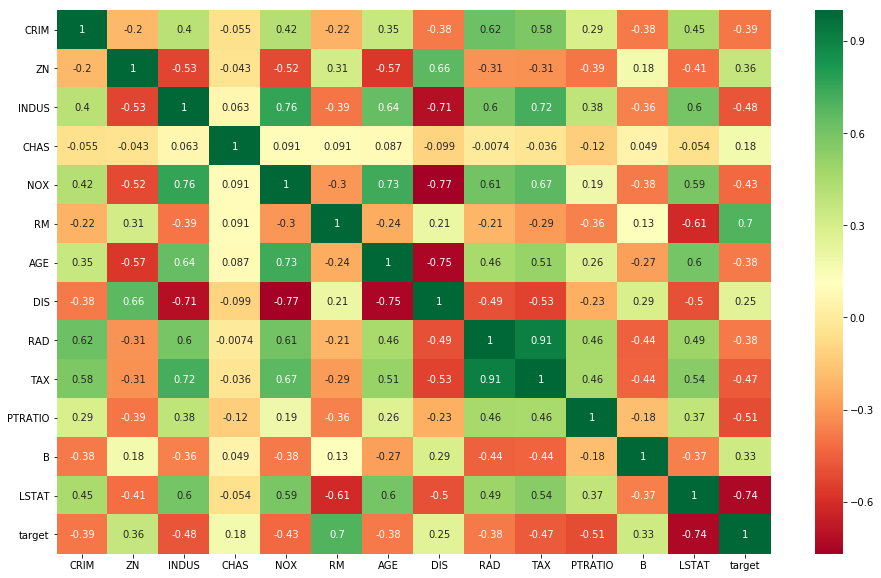

In [87]:
ax, fig = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot= True, cmap = 'RdYlGn')
plt.show()